In [1]:
# Some imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

sns.set()

In [2]:
# Import pandas
import pandas as pd

In [3]:
# Read the csv with the sample Port of Miami AIS data
# Data was projected to WGS 1984 UTM Zone 17N
# Filter the data to get only vessels with Status of "under way using engine"
dtc = pd.read_csv('MiamiShipData.csv')
dtc_filtered = dtc[dtc.Status==0]
dtc_filtered.count()
counts = dtc_filtered['VoyageID'].value_counts().to_dict()
len(counts)
dtc_filtered['VoyageID'].sort_values()

# Get a list of ship track ids
uv = dtc_filtered['VoyageID'].unique()
uv.size

1322

In [4]:
# Assemble sample Port of Miami AIS broadcast targets into tracks

shipTracks = []
for i in uv:
    dtc_v = ""
    dtc_v = dtc_filtered[dtc_filtered.VoyageID==i]
    dtc_v_use = ""
    dtc_v_use = dtc_v[['VoyageID', 'POINT_X', 'POINT_Y']]
    #if len(dtc_v_use.index) > 5000:
    shipTracks.append(dtc_v_use)
#shipTracks

In [5]:
#

odvectors = []

xrange = 625390 - 572000
yrange = 2870000 - 2830000

for shipTrack in shipTracks:
    
    fishnet = np.zeros((60,60))

    xvals = shipTrack[['POINT_X']].values
    yvals = shipTrack[['POINT_Y']].values

    xdiff = xvals - 570000
    xdex = ((xdiff / xrange) * 60).astype(int) - 1
    ydiff = yvals - 2830000
    ydex = ((ydiff / yrange) * 60).astype(int) - 1
    
    stack = np.hstack((xdex,ydex))
    
    for loc in stack:
        if loc[0] < 0:
            loc[0] = 0
        if loc[0] > 59:
            loc[0] = 59
        if loc[1] < 0:
            loc[1] = 0
        if loc[1] > 59:
            loc[1] = 59
        fishnet[loc[1],loc[0]] = 1

    odvectors.append(fishnet.reshape((1,3600)))
    
train_data = np.array(odvectors)


Text(0,0.5,'northing')

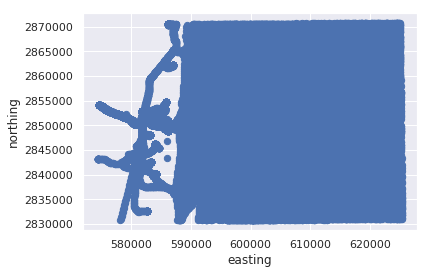

In [6]:
# Plot the filtered sample Port of Miami AIS ship locations
axu = plt.scatter(dtc_filtered['POINT_X'], dtc_filtered['POINT_Y'], s=40)
plt.xlabel('easting')
plt.ylabel('northing')

In [7]:
# Put X's and Y's of ship locations together in a numpy ndarray
stack = np.hstack((dtc_filtered[['POINT_X']].values, dtc_filtered[['POINT_Y']].values))
stack.size

1610626

In [8]:
#
from somShipWork import SOM

n = 3600
s = SOM(n,3,3)
save = s.w.copy()

s.train(train_data,0.8,2.0)


Iteration 10 / 100
Iteration 20 / 100
Iteration 30 / 100
Iteration 40 / 100
Iteration 50 / 100
Iteration 60 / 100
Iteration 70 / 100
Iteration 80 / 100
Iteration 90 / 100
Iteration 100 / 100


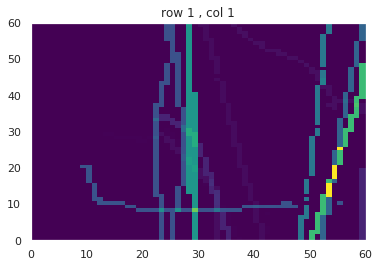

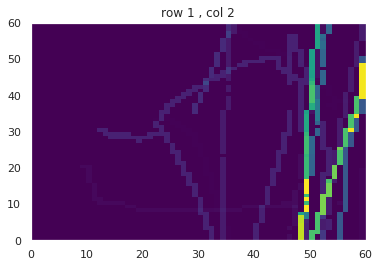

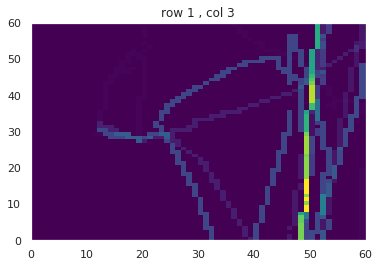

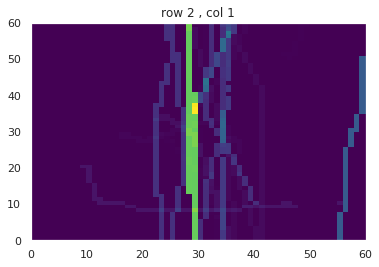

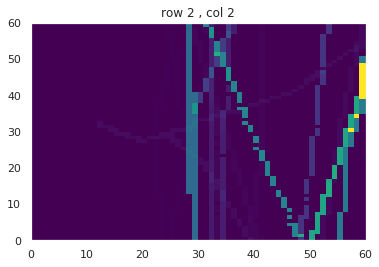

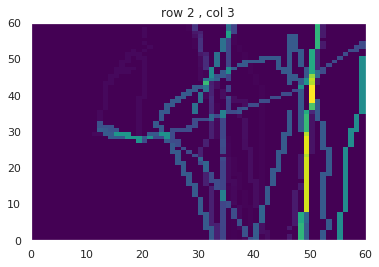

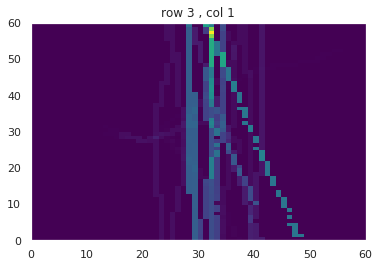

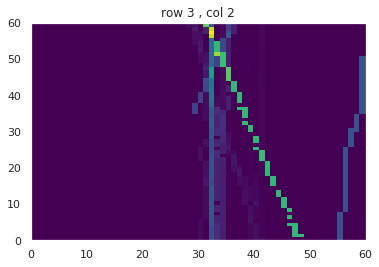

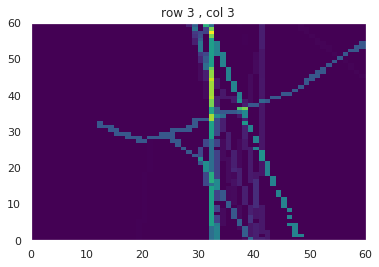

In [10]:
rs = s.w
#print(rs)

final = []
for rss in rs:
    #print(rss.shape)
    for rsss in rss:
        #print(rsss.shape)
        final.append(rsss.reshape((60,60)))
        
#print(final)
#sys.exit()

rc = 1
cc = 1
for f in final:
    c = plt.pcolor(f,cmap='viridis')
    plt.title('row ' + str(rc) + " , " + 'col ' + str(cc))
    cc += 1
    if cc == 4:
        cc = 1
        rc += 1
    plt.show()
    #sys.exit()